## <center> Final Project - Stage 1 (EDA) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [2]:
# import library yang diperlukan

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [3]:
# ubah parameter default matplotlib

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
# load dataset

df = pd.read_csv('ECommerce_finpro.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


### 1. Descriptive Statistics

#### A. NULL Values and Data Type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


terdapat 7 kolom dengan tipe data numerikal dan 4 kolom dengan tipe data string/kategorikal.

#### B. Missing Values

In [8]:
# Rename kolom
df = df.rename(columns={'Warehouse_block':'Warehouse','Mode_of_Shipment':'Shipment','Customer_care_calls':'Calls',
                        'Customer_rating':'Rating','Cost_of_the_Product':'Cost','Prior_purchases':'Purchases',

                        'Product_importance':'Importance','Discount_offered':'Discount','Weight_in_gms':'Weight (gram)','Reached.on.Time_Y.N':'Late'})

In [11]:
# cek nilai kosong/null tiap kolom

df.isna().sum()

ID               0
Warehouse        0
Shipment         0
Calls            0
Rating           0
Cost             0
Purchases        0
Importance       0
Gender           0
Discount         0
Weight (gram)    0
Late             0
dtype: int64

Tidak ada baris dengan nilai kosong (null).

#### C. Statistical Summary

In [12]:
# melihat summary statistik sederhana pada kolom dengan tipe data numerik 

df_num = df[['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)']]
df_num.describe()

,Calls,Rating,Cost,Purchases,Discount,Weight (gram)
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


In [13]:
# melihat summary statistik sederhana pada kolom dengan tipe data string/kategrikal

df_cat = df[['Warehouse','Shipment','Importance','Gender']]
df_cat.describe()

,Warehouse,Shipment,Importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [14]:
# melihat summary statistik sederhana pada kolom Late (target/label)

df['Late'].describe()

count    10999.000000
mean         0.596691
std          0.490584
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Late, dtype: float64

In [15]:
# pengelompokan feature

numericals = ['Cost', 'Discount', 'Weight (gram)', 'Calls', 'Purchases' ]
category = ['Warehouse', 'Shipment', 'Rating','Importance', 'Gender']

In [16]:
# Menghitung Variance
round(df[numericals].var(), 2)

Cost                2310.08
Discount             262.62
Weight (gram)    2674458.75
Calls                  1.30
Purchases              2.32
dtype: float64

In [17]:
# Menghitung Standard Deviation
round(df[numericals].std(), 2)

Cost               48.06
Discount           16.21
Weight (gram)    1635.38
Calls               1.14
Purchases           1.52
dtype: float64

Pada feature cost, discount. dan weight terlihat mempunyai sebaran data yang cukup besar.

In [28]:
# melihat jumlah masing-masing value pada feature categorical

for i in category:
    print(f'''Value count kolom {i}:''')
    print(df[i].value_counts())
    print()

Value count kolom Warehouse:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse, dtype: int64

Value count kolom Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Shipment, dtype: int64

Value count kolom Rating:
3    2239
1    2235
4    2189
5    2171
2    2165
Name: Rating, dtype: int64

Value count kolom Importance:
low       5297
medium    4754
high       948
Name: Importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



#### D. Hasil Observasi  <br>

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai? <br>
    Semua tipe data sudah sesuai <br>
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja? <br>
    Tidak ada kolom yang memiliki missing value <br>
C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) <br>
    Jika dilihat dari nilai max, variabel Purchases dan Discount kemungkinan memiliki nilai outlier

### 2. Univariate Analysis

#### A. Numericals

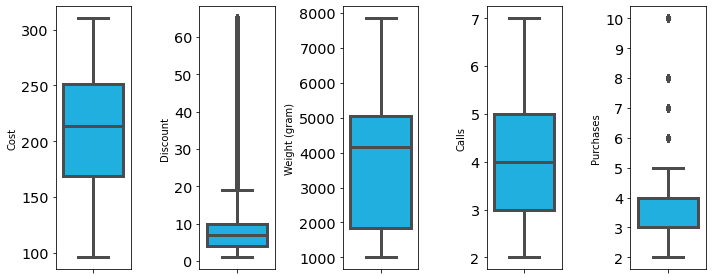

In [19]:
# melihat boxplot pada feature numerical

plt.figure(figsize=(10,4))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y=df[numericals[i]], color='deepskyblue', orient='v')
    plt.tight_layout()

Pada feature discount dan purchases terdapat outliier.

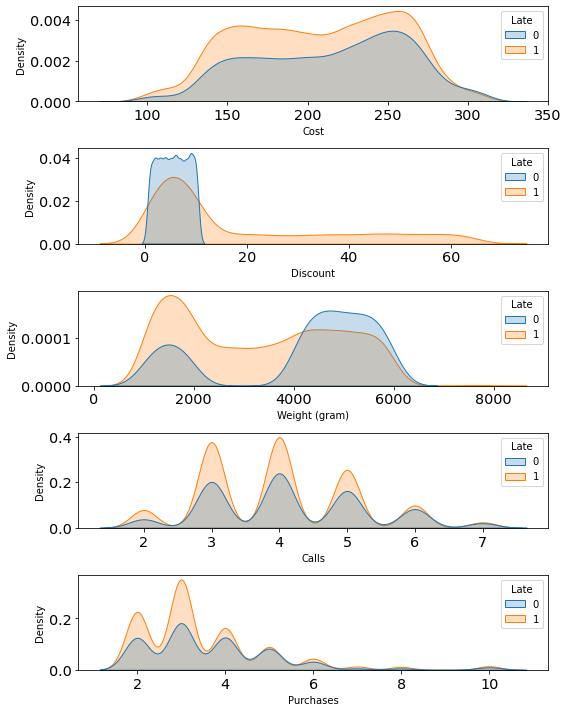

In [20]:
# melihat distribution plot pada feature numericals

plt.figure(figsize=(8,10))
for i in range(0, len(numericals)):
    plt.subplot(5,1, i+1)
    sns.kdeplot(data=df, x=df[numericals[i]], hue='Late', fill='True')
    plt.tight_layout()

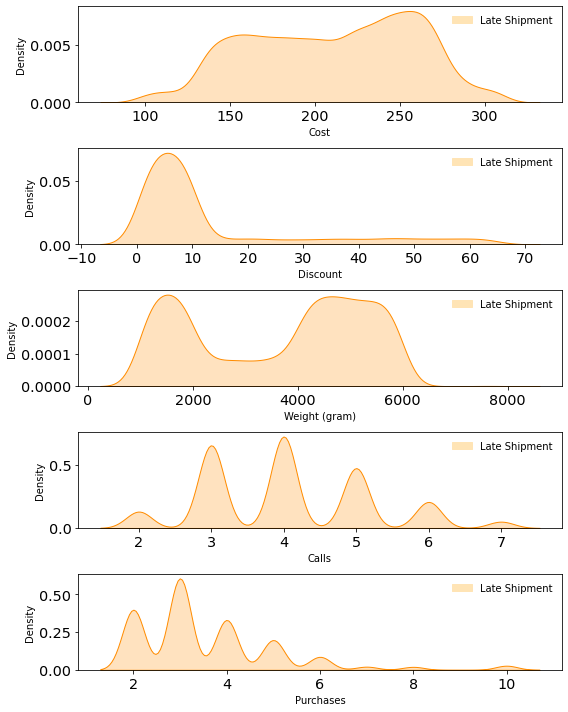

In [22]:
Latefix = df[df['Late']>0]
plt.figure(figsize=(8,10))
for i in range(0, len(numericals)):
    plt.subplot(5,1, i+1)
    sns.kdeplot(data=Latefix, x=df[numericals[i]], color='darkorange', fill='True')
    Orange_patch = mpatches.Patch(color='moccasin', label='Late Shipment')
    plt.legend(handles=[Orange_patch], frameon=False, loc=1)
    plt.tight_layout()

In [21]:
# Menghitung nilai skew
df[numericals].skew(axis=0, skipna=True)

Cost            -0.157117
Discount         1.798929
Weight (gram)   -0.249747
Calls            0.391926
Purchases        1.681897
dtype: float64

Pada feature purchases dan discount, terlihat distribution plotnya sangat positively skewed dengan nilai skewness cukup besar.

#### B. Category

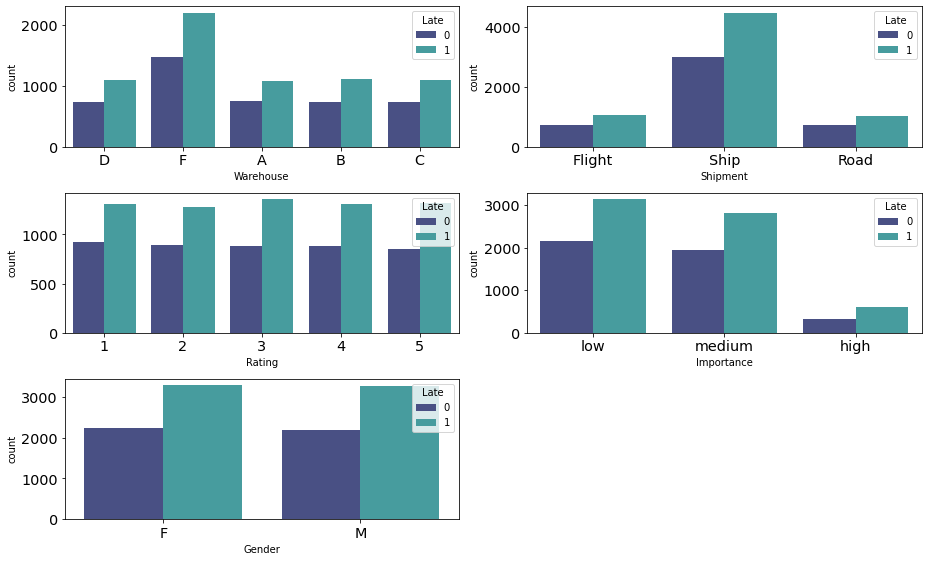

In [23]:
# melihat countplot pada feature categorical

plt.figure(figsize=(13,10))
for i in range(0, len(category)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x = df[category[i]], orient='v', hue=df['Late'], palette='mako')
    plt.tight_layout()

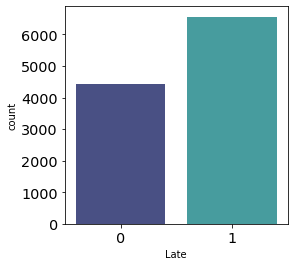

In [24]:
# melihat countplot pada target 'Late'

plt.figure(figsize=(4, 4))
sns.countplot(x=df['Late'], data=df, palette='mako')
plt.show()

Dari countplot di atas, terlihat label late bernilai 1 (barang terlambat) lebih banyak jumlanya dibanding label late bernilai 0 (on time).

#### C. Hasil Observasi  <br>
- Variabel Purchases dan Discount memiliki outlier dan membentuk pola positively Skewed
- Variabel Cost memiliki distribusi yang paling mendekati distribusi normal
- Warehouse block yang paling banyak digunakan adalah Warehouse F
- Shipment mode yang dominan adalah pengiriman dengan kapal
- Jumlah sampel yang mengalami keterlambatan pengiriman lebih banyak <br>

Apa yang harus di-follow up saat data pre-processing? <br>
- Remove outlier
- Melakukan OHE pada feature Warehouse dan Shipment
- Melakukan label encoding pada feature Gender dan Product Importance
- Melakukan standardisasi pada semua feature numerik
- Melakukan log transformation pada feature Discount dan Purchases

### 3. Multivariate Analysis

#### A. Heatmap Plot

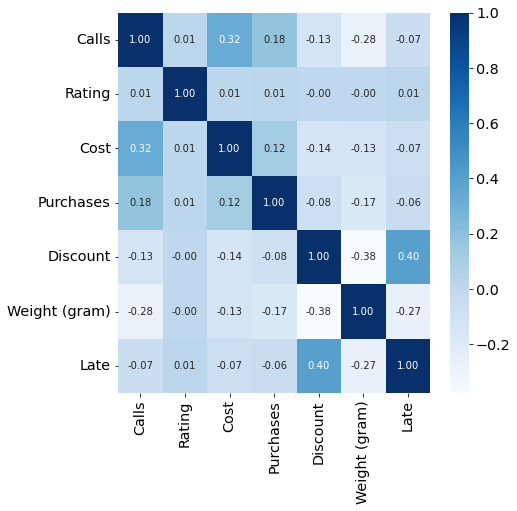

In [25]:
df_corr = df.drop(['ID'], axis=1) # drop kolom ID karena tidak punya pengaruh terhadap target/label Late
plt.figure(figsize=(7, 7))
sns.heatmap(df_corr.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

#### B. Scatter Plot

Plot antara masing-masing feature numerical.

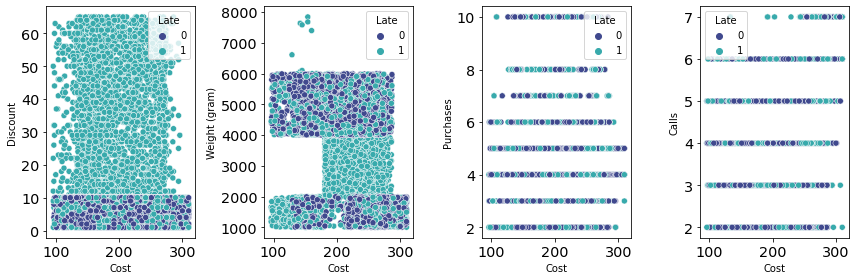

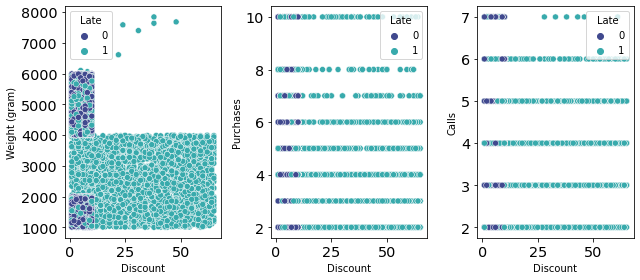

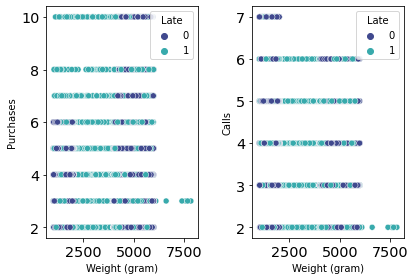

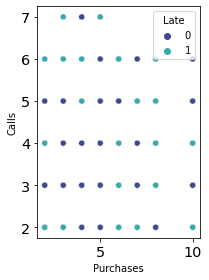

In [39]:
# plot feature cost terhadap feature numerik lain
s1 = ['Discount','Weight (gram)', 'Purchases', 'Calls']
fig = plt.figure(figsize=(12, 4))
for i in range(0, len(s1)): 
    ax = fig.add_subplot(1, 4, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Cost', y=s1[i], hue='Late', palette='mako')
    plt.tight_layout() 

# plot feature Discount terhadap feature numerik lain
s2 = ['Weight (gram)', 'Purchases', 'Calls']
fig = plt.figure(figsize=(9, 4))
for i in range(0, len(s2)): 
    ax = fig.add_subplot(1, 3, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Discount', y=s2[i], hue='Late', palette='mako')
    plt.tight_layout() 

# plot feature Weight terhadap feature numerik lain
s3 = [ 'Purchases', 'Calls']
fig = plt.figure(figsize=(6, 4))
for i in range(0, len(s3)): 
    ax = fig.add_subplot(1, 2, i+1) 
    sns.scatterplot(ax=ax, data=df, x='Weight (gram)', y=s3[i], hue='Late', palette='mako')
    plt.tight_layout() 

# plot feature Purchases terhadap feature Calls
fig = plt.figure(figsize=(3, 4))
sns.scatterplot(data=df, x='Purchases', y='Calls', hue='Late', palette='mako')
plt.tight_layout() 

#### C. Category Plot

Plot antara masing-masing feature categorical dengan feature numerical

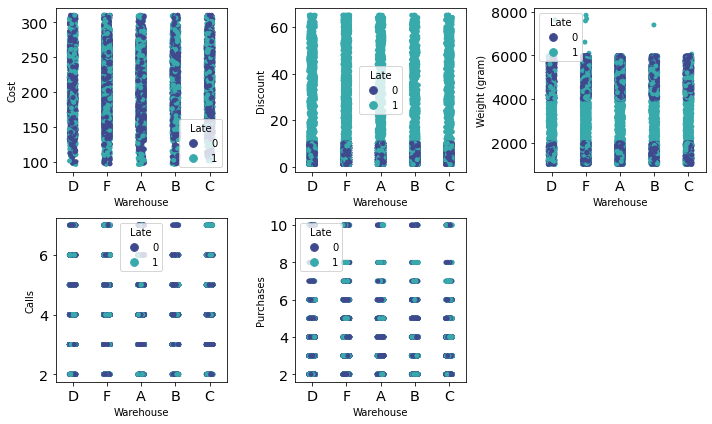

In [40]:
# category plot feature Warehouse terhadapt feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Warehouse', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

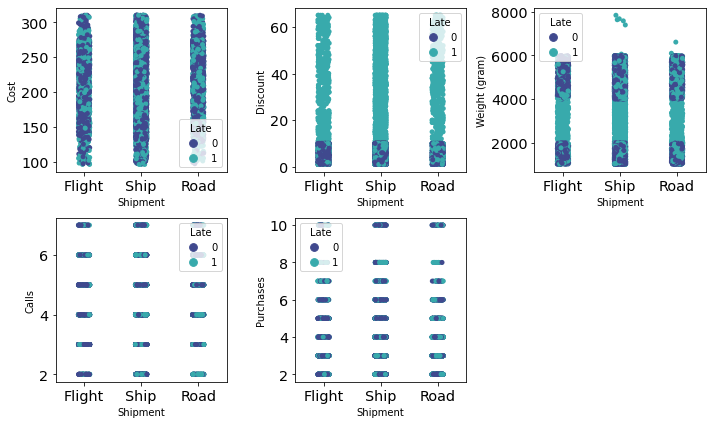

In [41]:
# category plot feature Shipment terhadapt feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Shipment', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

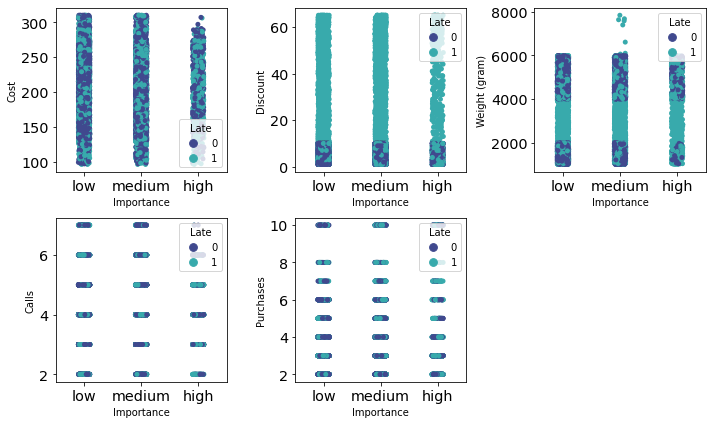

In [43]:
# category plot feature Product Importance terhadap feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Importance', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

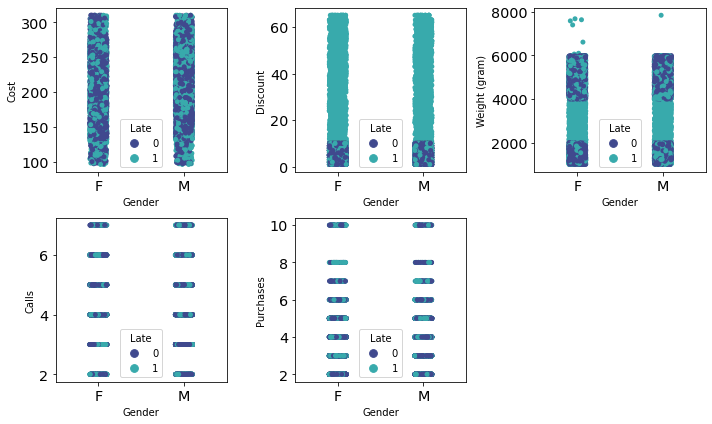

In [44]:
# category plot feature Gender terhadap feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Gender', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout() 

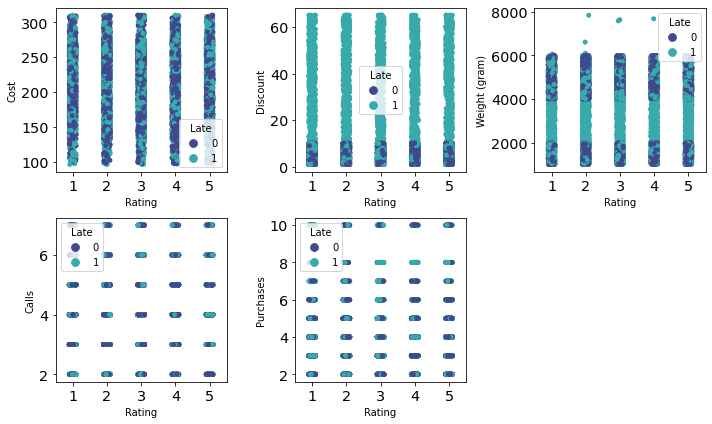

In [45]:
# category plot feature Rating terhadap feature numerical (Cost, Discount, Weight, Calls, dan Purchases)

fig = plt.figure(figsize=(10, 6))
for i in range(0, len(numericals)): 
    ax = fig.add_subplot(2, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Rating', y=numericals[i], hue='Late', palette='mako')
    plt.tight_layout()

#### D. Hasil Observasi  <br>
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana 
saja yang paling relevan dan harus dipertahankan? <br>
Discount dan Weight <br>
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu 
dilakukan terhadap feature itu? <br>
Weight terhadap Calls <br>
Weight terhadap Discount <br>
Cost terhadap Calls

### 4. Business Insight

#### A. Late Shipment Based On Discount

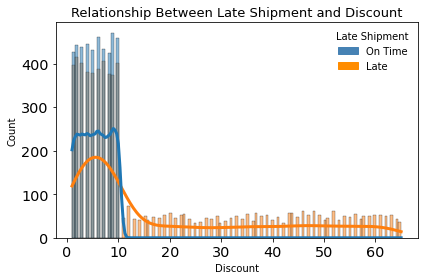

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Discount', hue='Late', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Discount', fontsize=13)
plt.tight_layout()

Untuk pembelian produk dengan discount diatas 10% banyak mengalami keterlambatan pengiriman. <br>
Dalam hal ini pihak e-commerce perlu memberikan notifikasi keterlambatan pengiriman kepada customer ketika melakukan pembelian dengan menggunakan discount yang besar yang memungkinkan produk yang dipesan tidak terkirim tepat waktu.

#### B. Late Shipment Based on Product Weight

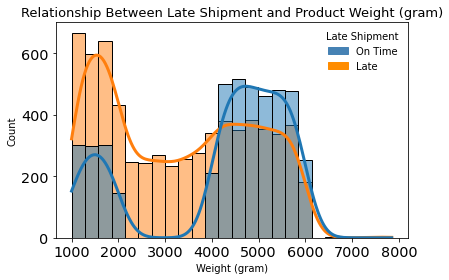

In [28]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Weight (gram)', hue='Late', kde=True)
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Product Weight (gram)', fontsize=13)
plt.tight_layout()

Barang dengan berat 2-4 Kg mengalami keterlambatan pengiriman. <br>
Dalam hal ini, pihak e-commerce perlu memberikan notifikasi keterlambatan pengiriman kepada customer yang membeli produk di rentang berat produk 2-4 kg sebelum customer melakukan transaksi.

#### C. Late Shipment Based on Customer Care Calls

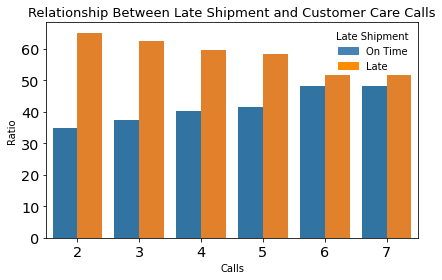

In [29]:
df_Calls1 = df.groupby(['Calls', 'Late']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah x'})
df_Calls2 = df.groupby(['Calls']).agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Jumlah y'})
df_Calls= df_Calls1.merge(df_Calls2,
                              left_on = ['Calls'],
                              right_on = ['Calls'],
                              how = 'inner')
df_Calls['Ratio'] = np.round(df_Calls['Jumlah x']*100 / df_Calls['Jumlah y'], 2)


plt.figure(figsize=(6,4))
sns.barplot(x='Calls', y ='Ratio', data = df_Calls, hue='Late')
Blue_patch = mpatches.Patch(color='steelblue', label='On Time')
Orange_patch = mpatches.Patch(color='darkorange', label='Late')
plt.legend(handles=[Blue_patch, Orange_patch], frameon=False, title='Late Shipment', loc=1)
plt.title('Relationship Between Late Shipment and Customer Care Calls', fontsize=13)
plt.tight_layout()

Berdasarkan data jumlah keterlambatan pengiriman menurun dengan meningkatnya jumlah telepon yang diterima oleh customer care.
Perusahaan perlu mencari informasi mengenai isi telepon customer kepada customer care (siapa penelpon, isi telepon), sehingga bisa menentukan korelasi dengan jumlah keterlambatan pengiriman.

Rekomendasi dengan Asumsi: 
1. Bila di asumsikan bahwa pelanggan menelpon untuk melakukan konfirmasi pemesanan, maka bisa dilakukan proses konfirmasi pemesanan dari pelanggan memberikan pengingat kepada penjual untuk segera melakukan konfirmasi ketersediaan barang dan kesiapaan pengiriman kepada bagian pengiriman atau kurir. (bisa dengan aplikasi atau ditambahkan pada petugas tertentu).
2. Bila di asumsikan bahwa penjual menelpon untuk melakukan konfirmasi kesediaan pesanan dan barang siap di kirim, maka bisa dilakukan proses otomatisasi saat penjual konfirmasi kesediaan barang, langsung barang disiapkan untuk di kirim pada hari yang sama dan mengirimkan konfirmasi untuk kurir mengirimkan.